In [1]:
import os
import numpy as np
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import keras
%matplotlib inline

Using TensorFlow backend.


In [89]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization,Input

depth = 10
filters = 64
model = Sequential()
#Adding layers

model.add(Conv2D(filters ,kernel_size=(3,3), activation='relu',padding = 'same', input_shape = (256,150,1)))

for i in range(depth-2):
    model.add(Conv2D(filters, kernel_size=(3,3), activation='relu',padding = 'same'))
    model.add(BatchNormalization())
    
model.add(Conv2D(1, kernel_size=(3,3), padding = 'same'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_140 (Conv2D)          (None, 256, 150, 64)      640       
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 256, 150, 64)      36928     
_________________________________________________________________
batch_normalization_110 (Bat (None, 256, 150, 64)      256       
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 256, 150, 64)      36928     
_________________________________________________________________
batch_normalization_111 (Bat (None, 256, 150, 64)      256       
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 256, 150, 64)      36928     
_________________________________________________________________
batch_normalization_112 (Bat (None, 256, 150, 64)      256       
__________

In [55]:
model.non_trainable_weights

[<tf.Variable 'batch_normalization_74/moving_mean:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_74/moving_variance:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_75/moving_mean:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_75/moving_variance:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_76/moving_mean:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_76/moving_variance:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_77/moving_mean:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_77/moving_variance:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_78/moving_mean:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_78/moving_variance:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_79/moving_mean:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_79/moving_

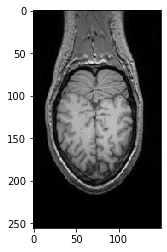

In [56]:
import nibabel as nib
import matplotlib.pyplot as plt
img = nib.load('IXI015-HH-1258-IXIMADisoTFE12_-s3T115_-0301-00003-000001-01.nii')
epi = img.get_fdata()
slice_A = epi[200,:,:]
fig, ax = plt.subplots()
ax.imshow(slice_A, cmap="gray")
plt.show()

In [21]:
import random
import numpy as np
def add_rician_noise_to_img(noise_percent,img):
    random_factor = noise_percent * np.random.normal(loc=0., scale=1., size=img.shape)
    noise_image_real = img + random_factor
    noise_image_img = random_factor
    noise_image_real = np.square(noise_image_real) 
    noise_image_img = np.square(noise_image_img) 
    rician_noise_square =  noise_image_img + noise_image_real
    rician_noise_image = np.sqrt(rician_noise_square)
    return rician_noise_image

In [61]:
slice_A_with_noise = add_rician_noise_to_img(0.2,slice_A)
slice_A_with_noise.dtype

dtype('float64')

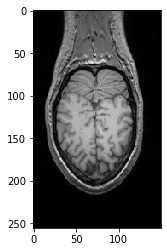

In [25]:
fig, ax = plt.subplots()
ax.imshow(slice_A_with_noise, cmap="gray")
plt.show()

In [26]:
residual_noise = slice_A_with_noise - slice_A

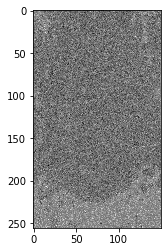

In [28]:
fig, ax = plt.subplots()
ax.imshow(residual_noise, cmap="gray")
plt.show()

In [69]:
import keras.backend as K
def sum_squared_error(y_true,y_pred):
    return K.sum(K.square(y_pred-y_true))/2

In [90]:
from keras import optimizers
model.compile(optimizer = optimizers.Adam(0.01), loss= sum_squared_error,metrics=["accuracy"])

In [91]:
model.fit(np.array(slice_A_with_noise).reshape(-1,256,150,1),np.array(residual_noise).reshape(-1,256,150,1),epochs=15)

Epoch 1/15
1/1 [==============================] - 4s 4s/step - loss: 54267.5234 - acc: 0.0000e+00
Epoch 2/15
1/1 [==============================] - 0s 95ms/step - loss: 566182.0000 - acc: 0.0000e+00
Epoch 3/15
1/1 [==============================] - 0s 89ms/step - loss: 143685.6875 - acc: 0.0000e+00
Epoch 4/15
1/1 [==============================] - 0s 87ms/step - loss: 39261.5156 - acc: 0.0000e+00
Epoch 5/15
1/1 [==============================] - 0s 86ms/step - loss: 104557.0312 - acc: 0.0000e+00
Epoch 6/15
1/1 [==============================] - 0s 84ms/step - loss: 46132.7148 - acc: 0.0000e+00
Epoch 7/15
1/1 [==============================] - 0s 83ms/step - loss: 17958.2656 - acc: 0.0000e+00
Epoch 8/15
1/1 [==============================] - 0s 83ms/step - loss: 4977.6094 - acc: 0.0000e+00
Epoch 9/15
1/1 [==============================] - 0s 85ms/step - loss: 3983.7168 - acc: 0.0000e+00
Epoch 10/15
1/1 [==============================] - 0s 85ms/step - loss: 8604.2969 - acc: 0.0000e+00
E

In [72]:
resi = model.predict(np.array(slice_A_with_noise).reshape(-1,256,150,1))
resi.shape

(1, 256, 150, 1)

C:\Users\devendra\Anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\Users\devendra\Anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\Users\devendra\Anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\devendra\Anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Users\devendra\Anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\colors.py:933: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Users\devendra\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\ma\core.py:713: UserWarning: Warning: converting a masked element to 

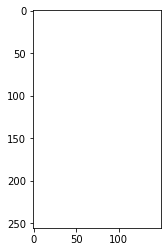

In [74]:
ig, ax = plt.subplots()
ax.imshow(resi.reshape(256,150), cmap="gray")
plt.show()